In [11]:
import requests
headers = {'default':{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36',"Referer": "https://www.google.com"},"alternative":{'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36',"Referer": "https://www.bing.com"}}
from bs4 import BeautifulSoup
from unidecode import unidecode
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.linear_model import Ridge
import datetime
import jdatetime
import math
import jalali_pandas
import json
from selenium.webdriver.chrome.options import Options

In [5]:
cities=['tehran','karaj','qazvin','tabriz']
cities=['tehran','karaj','tabriz','isfahan','qazvin']
prices=[]
kms=[]
years=[]
city=[]
dates=[]
colors=[]
body=[]
types=[]
urls=[]
today=['دقایقی' , 'لحظاتی' , 'ساعت','نیم','ربع']
for c in cities:
    #url=f'https://divar.ir/s/{c}/car/peugeot/207i/manual?brand_model=Peugeot%20207i%20Manual%20P'
    url='https://www.digikala.com'
    driver = webdriver.Chrome()
    driver.get(url)
    # Get the initial HTML source
    html = driver.page_source

    # Parse the HTML with BeautifulSoup
    soup = BeautifulSoup(html, "html.parser")

    # Print the title of the website
    try:
        print(soup.title.text)
    except AttributeError:
            pass
    # Define a function to scroll down the page
    def scroll_down():
        # Get the height of the document
        height = driver.execute_script("return document.body.scrollHeight")
        # Scroll to the bottom of the page
        driver.execute_script(f"window.scrollTo(0, {height});")
        # Wait for the new content to load
        time.sleep(3)

    # Scroll down the page 5 times
    for i in range(20):
        

        # Get the updated HTML source
        html = driver.page_source

        # Parse the HTML with BeautifulSoup
        soup=((BeautifulSoup(html, "html.parser")))
        results=soup.find_all('div',class_='kt-post-card__description')
        for i in range(len(results)):
            if i%2==0:
                kms.append(unidecode((((results[i].get_text()).replace('کیلومتر','')).strip()).replace(',','')))
                if c=='tehran':
                    city.append('Tehran')
                elif c=='karaj':
                    city.append('Karaj')
                elif c=='qazvin':
                    city.append('Qazvin')
                elif c=='isfahan':
                    city.append('Isfahan')
                elif c=='tabriz':
                    city.append('Tabriz')
                else:
                    city.append('N/A')
            else:
                prices.append(unidecode((((results[i].get_text()).replace('تومان','')).strip()).replace(',','')))
        results=soup.find_all("div",class_='kt-post-card__bottom')
        for i in range(len(results)):
            if any(x in today for x in (results[i].get_text()).split()):
                #jdatetime.date.fromgregorian(now.date())
                dates.append(str(jdatetime.date.today()))
            elif 'دیروز' in ((results[i].get_text()).split()):
                dates.append(str(jdatetime.date.today()-datetime.timedelta(days=1)))
            elif 'پریروز' in ((results[i].get_text()).split()):
                dates.append(str(jdatetime.date.today()-datetime.timedelta(days=2)))
            elif 'روز' in ((results[i].get_text()).split()):
                dates.append(str(jdatetime.date.today()-datetime.timedelta(days=(int(unidecode(results[i].get_text())[0])))))
            elif (('هفته') in ((results[i].get_text()).split())) or (('هفتهٔ') in ((results[i].get_text()).split())):
                if (results[i].get_text())[5] == ' ':
                    dates.append(str(jdatetime.date.today()-datetime.timedelta(days=(7))))
                else:
                    dates.append(str(jdatetime.date.today()-datetime.timedelta(days=(7*int(unidecode(results[i].get_text())[0])))))
            else:
                if i-1!=-1:
                    dates.append(dates[i-1])
                else:
                    dates.append(str(jdatetime.date.today()))
        results=soup.find_all("div",class_='post-card-item-af972 kt-col-6-bee95 kt-col-xxl-4-e9d46')
        for i in range(len(results)):
            a_tag=results[i].find('a')
            try:
                
                urls.append('https://www.divar.ir'+a_tag['href'])
            except TypeError:
                continue
        scroll_down()
        time.sleep(3)
    # Print the number of items on the page
    print(len(soup.find_all("div", class_="item")))

    # Close the driver
    driver.close()

فروشگاه اینترنتی دیجی‌کالا


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=119.0.6045.160)
Stacktrace:
	GetHandleVerifier [0x00007FF798DC82B2+55298]
	(No symbol) [0x00007FF798D35E02]
	(No symbol) [0x00007FF798BF05AB]
	(No symbol) [0x00007FF798BD0038]
	(No symbol) [0x00007FF798C56BC7]
	(No symbol) [0x00007FF798C6A15F]
	(No symbol) [0x00007FF798C51E83]
	(No symbol) [0x00007FF798C2670A]
	(No symbol) [0x00007FF798C27964]
	GetHandleVerifier [0x00007FF799140AAB+3694587]
	GetHandleVerifier [0x00007FF79919728E+4048862]
	GetHandleVerifier [0x00007FF79918F173+4015811]
	GetHandleVerifier [0x00007FF798E647D6+695590]
	(No symbol) [0x00007FF798D40CE8]
	(No symbol) [0x00007FF798D3CF34]
	(No symbol) [0x00007FF798D3D062]
	(No symbol) [0x00007FF798D2D3A3]
	BaseThreadInitThunk [0x00007FFA81D5257D+29]
	RtlUserThreadStart [0x00007FFA831CAA58+40]


In [14]:
colors=[]
body=[]
types=[]
years=[]
description=[]
for i in urls:
#     if i==urls[1]:
#         break
    #time.sleep(1)
    try:
        response = requests.get(i, headers=headers['default'])
        if response.status_code==200:
            pass
        elif response.status_code==404:
            colors.append('err')
            body.append('err')
            types.append('err')
            years.append('err')
            description.append('err')
            continue
        else:
            print(f'Failed. The status code is {response.status_code}\n Retrying...')
            time.sleep(2)
            response = requests.get(i, headers=headers['alternative'])
            if response.status_code==200:
                pass
            else:
                print(f'Failed. The status code is {response.status_code}')
    except ChunkedEncodingError:
        print('ChunkedEncodingError!/n Retrying...')
        time.sleep(2)
        response = requests.get(i, headers=headers['alternative'])
        if response.status_code==200:
            pass
        else:
            print(f'Failed. The ChunkedEncodingError Presists or may be connection error with the code {response.status_code} ')
    except InvalidChunkLength:
        print('ChunkedEncodingError!/n Retrying...')
        time.sleep(2)
        response = requests.get(i, headers=headers['alternative'])
        if response.status_code==200:
            pass
        else:
            print(f'Failed. The ChunkedEncodingError Presists or may be connection error with the code {response.status_code} ')
#     driver = webdriver.Chrome()
#     driver.get(f'https://www.divar.ir{i}')
#     # Get the initial HTML source
#     html = driver.page_source
    internal_soup=BeautifulSoup(response.content,"html.parser")
    internal_soup=str(internal_soup)
#     #results=internal_soup.find_all('span',class_="kt-group-row-item__value")
#     driver.close()
    pattern = r'"title":"رنگ","value":"([^"]*)"'
    match = re.search(pattern, internal_soup)
    try:
        colors.append((match.group(1)).replace('\u200c',' '))
    except AttributeError :
        colors.append('err')
        body.append('err')
        types.append('err')
        years.append('err')
        description.append('err')
        continue
    pattern = r'"title":"مدل \(سال تولید\)","value":"([^"]*)"'
    match = re.search(pattern, internal_soup)
    years.append(unidecode(match.group(1)))
    pattern = r'"title":"برند و تیپ","value":"([^"]*)"'
    match = re.search(pattern, internal_soup)
    types.append((match.group(1)))
    pattern = r'"title":"وضعیت بدنه","value":"([^"]*)"'
    match = re.search(pattern, internal_soup)
    try:
        body.append((match.group(1)).replace('\u200c',' '))
    except AttributeError:
        body.append('N/A')
    try:
        pattern = r'"DESCRIPTION_ROW","children":"([^"]*)"'
        match = re.findall(pattern, internal_soup)
        description.append(match[2])
    except AttributeError:
        description.append('N/A')

Failed. The status code is 429
 Retrying...
Failed. The status code is 429
 Retrying...
Failed. The status code is 429
 Retrying...
Failed. The status code is 429
 Retrying...
Failed. The status code is 429
 Retrying...
Failed. The status code is 429
 Retrying...
Failed. The status code is 429
 Retrying...
Failed. The status code is 429
 Retrying...
Failed. The status code is 429
 Retrying...
Failed. The status code is 429
 Retrying...


In [65]:
counter=0
for i in range(len(urls)):
    if colors[i-counter]=='err':
        del types[i-counter]
        del years[i-counter]
        del colors[i-counter]
        del prices[i-counter]
        del kms[i-counter]
        del body[i-counter]
        del dates[i-counter]
        del city[i-counter]
        del urls[i-counter]
        del description[i-counter]
        print(1)
        counter=counter+1
        continue
    if ((prices[i-counter].count('1'))>=4) or ((prices[i-counter].count('6'))>=4) or ((prices[i-counter].count('5'))>=4) or ((prices[i-counter].count('4'))>=4) or ((prices[i-counter].count('3'))>=4)or ((prices[i-counter].count('2'))>=4):
        del types[i-counter]
        del years[i-counter]
        del colors[i-counter]
        del prices[i-counter]
        del kms[i-counter]
        del body[i-counter]
        del dates[i-counter]
        del city[i-counter]
        del urls[i-counter]
        del description[i-counter]
        counter=counter+1
        print(2)
        continue
    try:
        int(years[i-counter])
    except ValueError:
        del types[i-counter]
        del years[i-counter]
        del colors[i-counter]
        del prices[i-counter]
        del kms[i-counter]
        del body[i-counter]
        del dates[i-counter]
        del city[i-counter]
        del urls[i-counter]
        del description[i-counter]
        print(3)
        counter=counter+1
        continue
    try:
        int(prices[i-counter])
    except ValueError:
        del types[i-counter]
        del years[i-counter]
        del colors[i-counter]
        del prices[i-counter]
        del kms[i-counter]
        del body[i-counter]
        del dates[i-counter]
        del city[i-counter]
        del urls[i-counter]
        del description[i-counter]
        counter=counter+1
        print(4)
        continue
    if urls[i-counter].count('حواله'):
        del types[i-counter]
        del years[i-counter]
        del colors[i-counter]
        del prices[i-counter]
        del kms[i-counter]
        del body[i-counter]
        del dates[i-counter]
        del city[i-counter]
        del urls[i-counter]
        del description[i-counter]
        counter=counter+1
        print(4)
        continue
    if description[i-counter].count('حواله'):
        del types[i-counter]
        del years[i-counter]
        del colors[i-counter]
        del prices[i-counter]
        del kms[i-counter]
        del body[i-counter]
        del dates[i-counter]
        del city[i-counter]
        del urls[i-counter]
        del description[i-counter]
        counter=counter+1
        print(5)
        continue
    if description[i-counter].count('پیش پرداخت'):
        del types[i-counter]
        del years[i-counter]
        del colors[i-counter]
        del prices[i-counter]
        del kms[i-counter]
        del body[i-counter]
        del dates[i-counter]
        del city[i-counter]
        del urls[i-counter]
        del description[i-counter]
        print(6)
        counter=counter+1
        continue
    if description[i-counter].count('tu3'):
        del types[i-counter]
        del years[i-counter]
        del colors[i-counter]
        del prices[i-counter]
        del kms[i-counter]
        del body[i-counter]
        del dates[i-counter]
        del city[i-counter]
        del urls[i-counter]
        del description[i-counter]
        print(6)
        counter=counter+1
        continue
    if description[i-counter].count('Tu3'):
        del types[i-counter]
        del years[i-counter]
        del colors[i-counter]
        del prices[i-counter]
        del kms[i-counter]
        del body[i-counter]
        del dates[i-counter]
        del city[i-counter]
        del urls[i-counter]
        del description[i-counter]
        print(6)
        counter=counter+1
        continue
    if description[i-counter].count('TU3'):
        del types[i-counter]
        del years[i-counter]
        del colors[i-counter]
        del prices[i-counter]
        del kms[i-counter]
        del body[i-counter]
        del dates[i-counter]
        del city[i-counter]
        del urls[i-counter]
        del description[i-counter]
        print(6)
        counter=counter+1
        continue
print(len(prices),len(kms),len(dates),len(urls),len(city),len(years),len(colors),len(body),len(types),len(description))


6
6
487 487 487 487 487 487 487 487 487 487


In [66]:
print(len(prices),len(kms),len(dates),len(urls),len(city),len(years),len(colors),len(body),len(types),len(description))

487 487 487 487 487 487 487 487 487 487


In [67]:
unique_body=[]
unique_types=[]
unique_colors=[]
unique_engine=[]
body_codes={}
types_codes={}
colors_codes={}
engine_codes={}
colors=['سفید'if x=='سفید صدفی' else x for x in colors]
unique_body=list(set(body))
unique_types=list(set(types))
unique_colors=list(set(colors))
for i in range(len(unique_types)):
    types_codes[unique_types[i]]=i  
for i in range(len(unique_colors)):
    colors_codes[unique_colors[i]]=i
for i in range(len(unique_body)):
    body_codes[unique_body[i]]=i
for i in range(len(unique_engine)):
    engine_codes[unique_engine[i]]=i
df=pd.DataFrame(list(zip(types,years,colors,prices,kms,body,dates,city,urls,description)),columns=['Model','Manufactured Year','Color','Price','Mileage','Body Condition','Date','City','URL','Description'])
df["Price"] = df["Price"].astype(float)
df=df[df['Price']<=3*(df['Price'].mean())]
df_encoded=df
df_encoded['Color']=df_encoded['Color'].replace(colors_codes)
df_encoded['Body Condition']=df_encoded['Body Condition'].replace(body_codes)
df_encoded['Model']=df_encoded['Model'].replace(types_codes)
df_encoded['Manufactured Year']=df_encoded['Manufactured Year'].astype(int)
df_encoded['Mileage']=df_encoded['Mileage'].astype(float)

In [68]:
df_encoded=df_encoded[(df_encoded['Price']<2*df_encoded['Price'].mean()) & (df_encoded['Price']>0.55*df_encoded['Price'].mean())]
X=df_encoded[['Model','Manufactured Year','Color','Mileage','Body Condition']]
Y=df_encoded['Price']
max_precision_linear=(0,0)
max_precision_rfr=(0,0)


In [69]:
for i in range(5):
    try:
        
        i=i+1
        poly=pf(degree=i)
        X_poly=poly.fit_transform(X)
        x_train,x_test,y_train,y_test=train_test_split(X_poly,Y,random_state=0)
        linreg=LinearRegression().fit(x_train,y_train)
        rf=rfr().fit(x_train, y_train)
        print(f'The Linear model with degree of {i} achieved the score of "{linreg.score(x_test,y_test)}"')
        print(f'The RandomForest model with degree of {i} achieved the score of "{rf.score(x_test,y_test)}"')

        if linreg.score(x_test,y_test)>max_precision_linear[0]:
            max_precision_linear=(linreg.score(x_test,y_test),i)
        if rf.score(x_test,y_test)>max_precision_rfr[0]:
            max_precision_rfr=(rf.score(x_test,y_test),i)
        if linreg.score(x_test,y_test)<0 and rf.score(x_test,y_test)<0:
            print('Ending Model Selection!')
            break
    except ValueError:
        print('Aborting...')
        break
else:
    print('Done!')

The Linear model with degree of 1 achieved the score of "0.6802358604155776"
The RandomForest model with degree of 1 achieved the score of "0.7603739812843104"
The Linear model with degree of 2 achieved the score of "-2.9741625466562986"
The RandomForest model with degree of 2 achieved the score of "0.7768259378259104"
The Linear model with degree of 3 achieved the score of "-1276.423110793432"
The RandomForest model with degree of 3 achieved the score of "0.7769180776347239"
The Linear model with degree of 4 achieved the score of "-161400.1114485336"
The RandomForest model with degree of 4 achieved the score of "0.7670282389907102"
The Linear model with degree of 5 achieved the score of "-119193203.9866963"
The RandomForest model with degree of 5 achieved the score of "0.7733731443525953"
Done!


In [70]:
if max_precision_linear[0]>max_precision_rfr[0]:
    poly=pf(degree=max_precision_linear[1])
    X_poly=poly.fit_transform(X)
    x_train,x_test,y_train,y_test=train_test_split(X_poly,Y,random_state=0)
    linreg=LinearRegression().fit(x_train,y_train)
    df_encoded['Predicted Price']=linreg.predict(X_poly)
    print(f'Linear model is choosen over RFR with degree of {max_precision_linear[1]} and score of {max_precision_linear[0]}')
else:
    poly=pf(degree=max_precision_rfr[1])
    X_poly=poly.fit_transform(X)
    x_train,x_test,y_train,y_test=train_test_split(X_poly,Y,random_state=0)
    rf=rfr().fit(x_train,y_train)
    df_encoded['Predicted Price']=rf.predict(X_poly)
    print(f'RFR model is choosen over Linear with degree of {max_precision_rfr[1]} and score of {max_precision_rfr[0]}')

RFR model is choosen over Linear with degree of 3 and score of 0.7769180776347239


C:\Users\kiann\AppData\Local\Temp\ipykernel_8240\3479682004.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Predicted Price']=rf.predict(X_poly)


In [71]:
df_encoded['Price Difference'] =df_encoded['Predicted Price'] - df_encoded['Price']
df_encoded.sort_values(by='Price Difference',inplace=True,ascending=False)
df=df_encoded
reversed_dict = {value: key for key, value in colors_codes.items ()}
df['Color']=df['Color'].replace(reversed_dict)
reversed_dict = {value: key for key, value in body_codes.items ()}
df['Body Condition']=df['Body Condition'].replace(reversed_dict)
reversed_dict = {value: key for key, value in types_codes.items ()}
df['Model']=df['Model'].replace(reversed_dict)

C:\Users\kiann\AppData\Local\Temp\ipykernel_8240\4251937462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['Price Difference'] =df_encoded['Predicted Price'] - df_encoded['Price']
C:\Users\kiann\AppData\Local\Temp\ipykernel_8240\4251937462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.sort_values(by='Price Difference',inplace=True,ascending=False)


In [72]:
df.sort_index(inplace=True,ascending=True)
(df.to_csv(f'divar_207.csv',encoding='utf-8-sig'))

In [78]:
df[df['Model']=='پژو 207i پانوراما دنده‌ای'].sort_values(by='Price Difference',ascending=False).head(20)

,Model,Manufactured Year,Color,Price,Mileage,Body Condition,Date,City,URL,Description,Predicted Price,Price Difference
349,پژو 207i پانوراما دنده‌ای,1402,سفید,498000000.0,0.0,سالم و بی خط و خش,1402-08-10,Qazvin,https://www.divar.ir/v/پژو-207i-پانوراما-دنده-...,سلام پژو ۲۰۷iارتقا یافته حوالش فروخته می‌شود ق...,6.727785e+08,1.747785e+08
334,پژو 207i پانوراما دنده‌ای,1400,سفید,477000000.0,28800.0,خط و خش جزیی,1402-08-17,Qazvin,https://www.divar.ir/v/1400-207_سواری-و-وانت_ق...,باسلام\n۲۰۷ مدل ۱۴۰۰ پانا سقف شیشه\nکم کارکرد\...,5.125617e+08,3.556167e+07
83,پژو 207i پانوراما دنده‌ای,1401,سفید,630000000.0,0.0,سالم و بی خط و خش,1402-08-21,Isfahan,https://www.divar.ir/v/پژو-207i-پانوراما-دنده-...,ماشین ٠ کیلومتر بدون خط و خش,6.653268e+08,3.532678e+07
72,پژو 207i پانوراما دنده‌ای,1401,سفید,636000000.0,0.0,سالم و بی خط و خش,1402-08-22,Isfahan,https://www.divar.ir/v/پژو207-پانوراما-دنده-ای...,ماشین صفر خشگ میباشد\nپانوراما فول کامل \nفرما...,6.653268e+08,2.932678e+07
257,پژو 207i پانوراما دنده‌ای,1401,سفید,637000000.0,0.0,سالم و بی خط و خش,1402-07-26,Isfahan,https://www.divar.ir/v/پژو-207i-پانوراما-دنده-...,خودرو صفر تحویل مرداد ماه در پارکینگ مسقف می باشد,6.653268e+08,2.832678e+07
195,پژو 207i پانوراما دنده‌ای,1401,سفید,640000000.0,0.0,سالم و بی خط و خش,1402-08-10,Isfahan,https://www.divar.ir/v/پژو-207i-پانوراما-صفر-۱...,با سلام\nپژو ۲۰۷ سقف شیشه ای\nصفر\nفول اپشن\nر...,6.653268e+08,2.532678e+07
250,پژو 207i پانوراما دنده‌ای,1401,سفید,630000000.0,90.0,سالم و بی خط و خش,1402-07-26,Isfahan,https://www.divar.ir/v/پژو-207i-پانوراما-دنده-...,معاوضه ندارم فقط نقد,6.505080e+08,2.050798e+07
5,پژو 207i پانوراما دنده‌ای,1401,سفید,583000000.0,57000.0,سالم و بی خط و خش,1402-08-24,Isfahan,https://www.divar.ir/v/پژو-207i-پانوراما-دنده-...,خودرو تمامی مصرفی ها تعویض شده\nدیسک و صفحه تع...,6.018792e+08,1.887917e+07
10,پژو 207i پانوراما دنده‌ای,1401,سفید,583000000.0,57000.0,سالم و بی خط و خش,1402-08-24,Isfahan,https://www.divar.ir/v/پژو-207i-پانوراما-دنده-...,خودرو تمامی مصرفی ها تعویض شده\nدیسک و صفحه تع...,6.018792e+08,1.887917e+07
102,پژو 207i پانوراما دنده‌ای,1401,مشکی,595000000.0,35.0,سالم و بی خط و خش,1402-08-24,Isfahan,https://www.divar.ir/v/پژو-207i-پانا-دنده-ایی-...,چهار حلقه لاستیک هانکوک \nگارانتی تا 1404\nکار...,6.120167e+08,1.701667e+07


In [79]:
df[df['Model']=='پژو 207i پانوراما دنده‌ای'].sort_values(by='Price Difference',ascending=False)['URL'].iloc[9]

'https://www.divar.ir/v/پژو-207i-پانا-دنده-ایی-1401_سواری-و-وانت_اصفهان_بزرگمهر_دیوار/QZ4Qs3d_'

In [77]:
pattern = r'"DESCRIPTION_ROW","children":"([^"]*)"'
match = re.findall(pattern, script_text)
match[2]

'بدون رنگ بدون نقطه برج ۱۴۰۱.۱۲می باشد'

In [24]:
colors

['err']

In [22]:
script_tag

[]

In [19]:
print(len(prices),len(kms),len(dates),len(urls),len(city),len(years),len(colors),len(body),len(engine),len(insurance),len(types),len(description))

1 1 1 1 1 1 1 1 1 1 1 1


In [15]:
for i,j in [(1,2),(3,4)]:
    print(f'i={i} j={j}')

i=1 j=2
i=3 j=4


<!DOCTYPE html>
<html dir="rtl" lang="fa"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><meta content="2" name="next-head-count"/><link as="style" href="/_next/static/css/48e1fe322e4abcb2.css" rel="preload"/><link data-n-g="" href="/_next/static/css/48e1fe322e4abcb2.css" rel="stylesheet"/><noscript data-n-css=""></noscript><script defer="" nomodule="" src="/_next/static/chunks/polyfills-c67a75d1b6f99dc8.js"></script><script defer="" src="/_next/static/chunks/webpack-7b14e7ef23592a55.js"></script><script defer="" src="/_next/static/chunks/framework-35e707db5b77429c.js"></script><script defer="" src="/_next/static/chunks/main-0319193acc4fb322.js"></script><script defer="" src="/_next/static/chunks/pages/_app-e29a84398c2cc6a8.js"></script><script defer="" src="/_next/static/chunks/pages/routing-f9896d223dfe6806.js"></script><script defer="" src="/_next/static/sTpCky3IMGeK113X3zj5z/_buildManifest.js"></script><script defer="" src="/_next/static/sTpCky3IMG
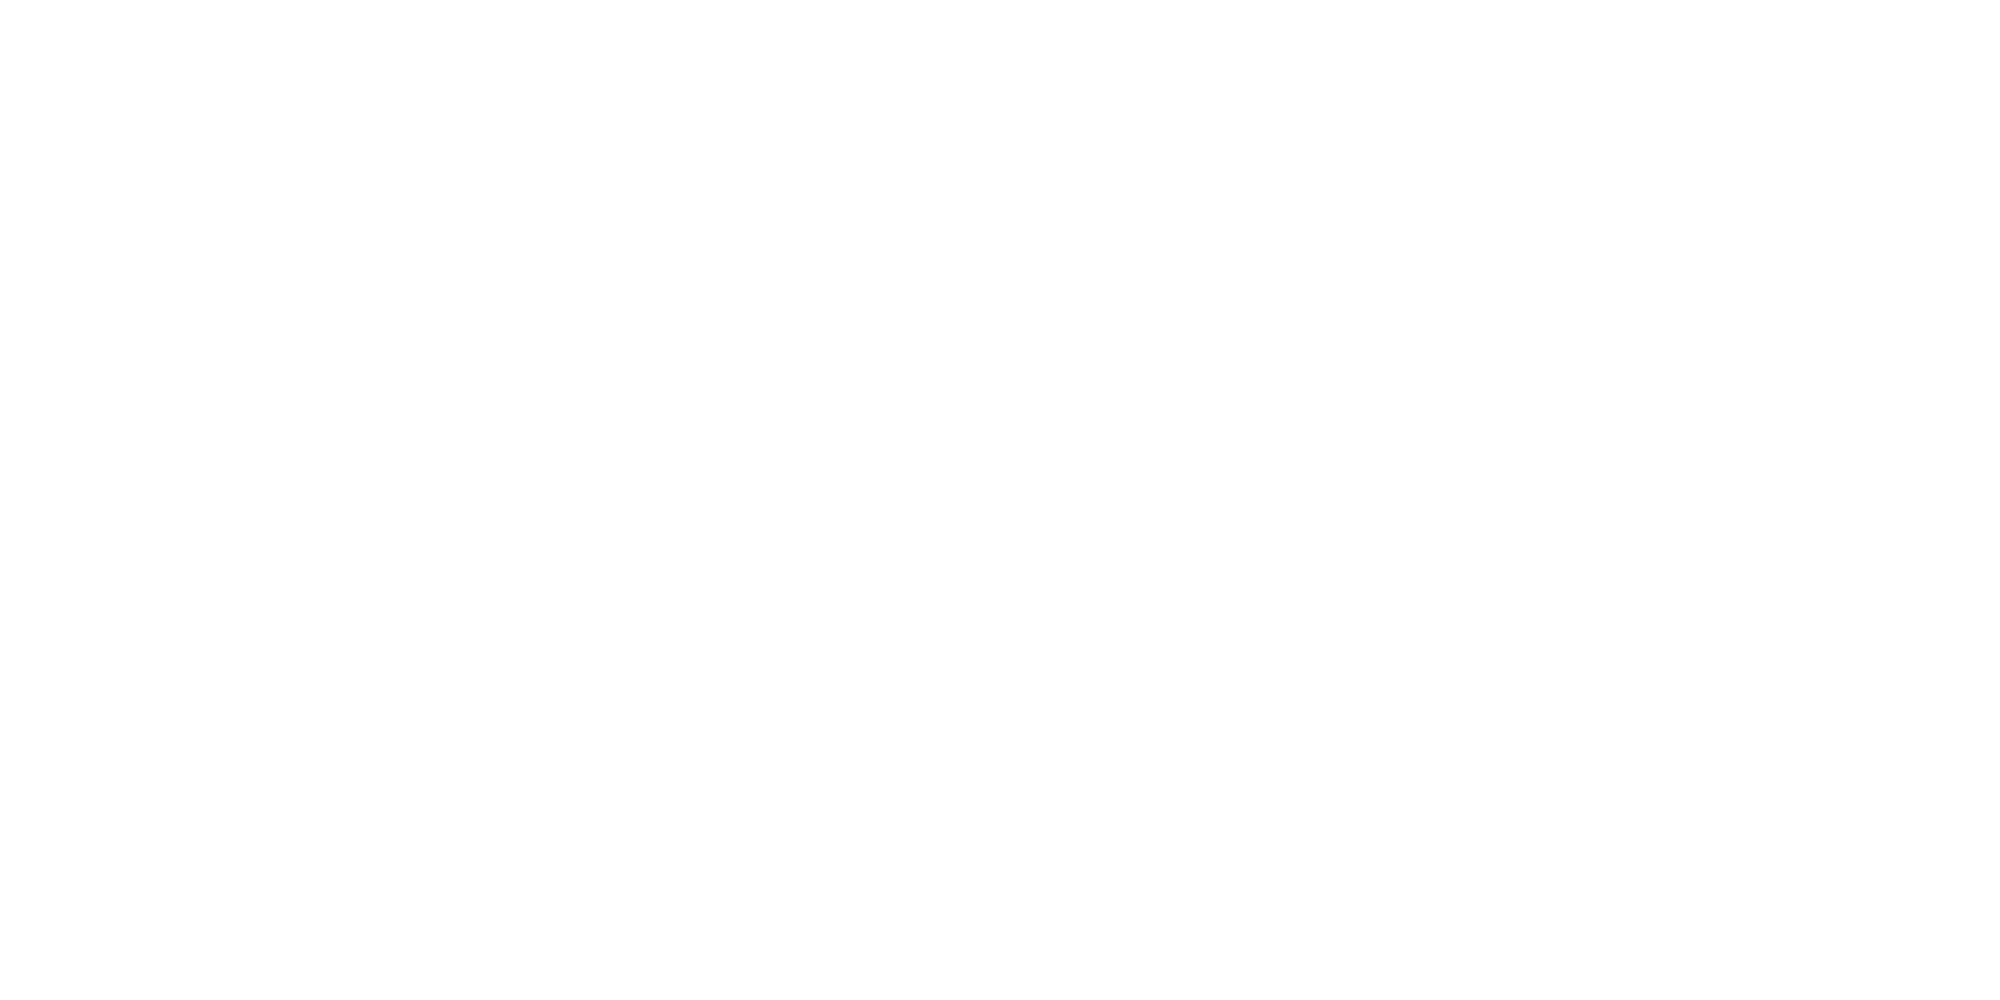

In [9]:
response = requests.get('https://www.digikala.com/product/dkp-10560714/%D9%87%D8%AF%D9%81%D9%88%D9%86-%D8%A8%D9%84%D9%88%D8%AA%D9%88%D8%AB%DB%8C-%D9%87%D9%88%D8%A2%D9%88%DB%8C-%D9%85%D8%AF%D9%84-freebuds-5i/#gallery', headers=headers['default'])
internal_soup=BeautifulSoup(response.content,"html.parser")
internal_soup

In [68]:
url=f'https://www.digikala.com/product/dkp-10560714/%D9%87%D8%AF%D9%81%D9%88%D9%86-%D8%A8%D9%84%D9%88%D8%AA%D9%88%D8%AB%DB%8C-%D9%87%D9%88%D8%A2%D9%88%DB%8C-%D9%85%D8%AF%D9%84-freebuds-5i/#gallery'
# Create a ChromeOptions object
options = Options()

# Add the arguments for headless mode
#options.add_argument("--headless")
options.add_argument('--blink-settings=imagesEnabled=false')
options.add_argument('--disable-extensions')
options.add_argument('--disable-javascript')
#options.page_load_strategy = 'eager'
# Optionally, set the window size

# Create a ChromeDriver object with the options
driver = webdriver.Chrome(options=options)
driver.get(url)
print(driver.title)
time.sleep(3)
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
driver.close()

فروشگاه اینترنتی دیجی‌کالا


In [69]:
soup.find_all('div',class_='overflow-hidden rounded cursor-pointer bg-neutral-000 ml-2 lg:mb-3 flex items-center styles_ProductImagesModal__productImage__fzbFF')

[<div class="overflow-hidden rounded cursor-pointer bg-neutral-000 ml-2 lg:mb-3 flex items-center styles_ProductImagesModal__productImage__fzbFF" style="width: 68px; height: 68px; border-radius: 8px; line-height: 0;"><img alt="" class="w-full bg-neutral-000 inline-block" height="68" src="https://dkstatics-public.digikala.com/digikala-products/e9720771e3bbdb5908018650248b46405f85e31b_1674987536.jpg?x-oss-process=image/resize,m_lfit,h_800,w_800/quality,q_90" style="object-fit: cover; border-radius: 8px;" title="" width="68"/></div>,
 <div class="overflow-hidden rounded cursor-pointer bg-neutral-000 ml-2 lg:mb-3 flex items-center styles_ProductImagesModal__productImage__fzbFF" style="width: 68px; height: 68px; border-radius: 8px; line-height: 0;"><img alt="" class="w-full bg-neutral-000 inline-block" height="68" src="https://dkstatics-public.digikala.com/digikala-products/87994c637873bdce5413de1a756592e55605b05d_1674987534.jpg?x-oss-process=image/resize,m_lfit,h_800,w_800/quality,q_90" st

In [20]:
driver.close()

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=119.0.6045.160)
Stacktrace:
	GetHandleVerifier [0x00007FF798DC82B2+55298]
	(No symbol) [0x00007FF798D35E02]
	(No symbol) [0x00007FF798BF05AB]
	(No symbol) [0x00007FF798BDD1AA]
	(No symbol) [0x00007FF798BDD9CE]
	(No symbol) [0x00007FF798BF0AF8]
	(No symbol) [0x00007FF798BCFB90]
	(No symbol) [0x00007FF798C5C714]
	(No symbol) [0x00007FF798C52070]
	(No symbol) [0x00007FF798C2670A]
	(No symbol) [0x00007FF798C27964]
	GetHandleVerifier [0x00007FF799140AAB+3694587]
	GetHandleVerifier [0x00007FF79919728E+4048862]
	GetHandleVerifier [0x00007FF79918F173+4015811]
	GetHandleVerifier [0x00007FF798E647D6+695590]
	(No symbol) [0x00007FF798D40CE8]
	(No symbol) [0x00007FF798D3CF34]
	(No symbol) [0x00007FF798D3D062]
	(No symbol) [0x00007FF798D2D3A3]
	BaseThreadInitThunk [0x00007FFA81D5257D+29]
	RtlUserThreadStart [0x00007FFA831CAA58+40]
